# Alpha-angle classification

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import numpy as np
import pandas as pd

from data import Data
from dataset import Dataset
from clusterizer import Clusterizer
from trainer import Trainer

In [2]:
data = Data()

Files reading...
File: training_30


  0%|          | 11/9248 [00:00<01:25, 108.56it/s]

Targets calculating...


100%|██████████| 9248/9248 [01:42<00:00, 89.84it/s] 


Data size: 9248


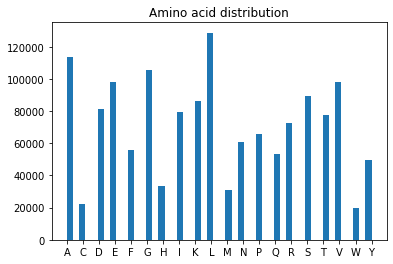

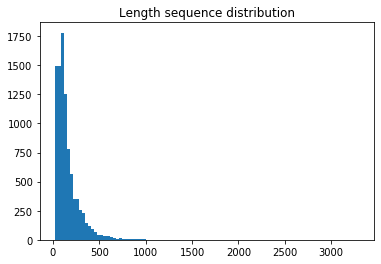

In [3]:
print('Data size:', len(data.seqs))

plt.hist(sorted([a for aa in data.seqs for a in aa]), bins=50);
plt.title('Amino acid distribution')
plt.show()

plt.hist([len(aa) for aa in data.seqs], bins=100);
plt.title('Length sequence distribution')
plt.show()

In [4]:
dataset_8 = Dataset(data, 220, len_subseq=8, batch_size=32)
dataset_16 = Dataset(data, 220, len_subseq=16, batch_size=32)
dataset_32 = Dataset(data, 220, len_subseq=32, batch_size=32)

100%|██████████| 9248/9248 [00:05<00:00, 1731.91it/s]


Train dataset size with subsequence length of 8: 76228
Train dataset size with subsequence length of 16: 36595
Train dataset size with subsequence length of 32: 16628


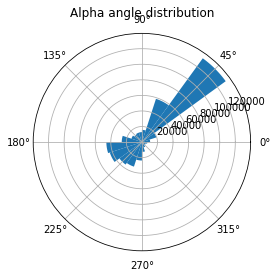

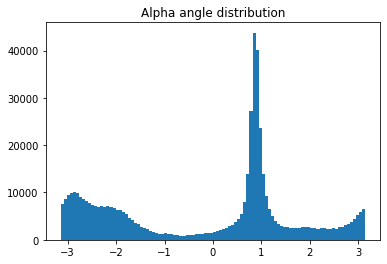

In [5]:
train_dataset_8 = dataset_8.train_data_features
train_dataset_16 = dataset_16.train_data_features
train_dataset_32 = dataset_32.train_data_features

print('Train dataset size with subsequence length of 8:', len(train_dataset_8[0]))
print('Train dataset size with subsequence length of 16:', len(train_dataset_16[0]))
print('Train dataset size with subsequence length of 32:', len(train_dataset_32[0]))

train_alphas = np.array([a for aa in train_dataset_8[2] for a in aa])

plt.subplot(111, polar=True).hist(train_alphas, bins=20);
plt.title('Alpha angle distribution')
plt.show()

plt.hist(train_alphas, bins=100);
plt.title('Alpha angle distribution')
plt.show()

# 2-class classification

In [6]:
clusterizer_2 = Clusterizer(dataset_8, n_clusters=2)

Class 0: 253838 elements
Class 1: 279758 elements


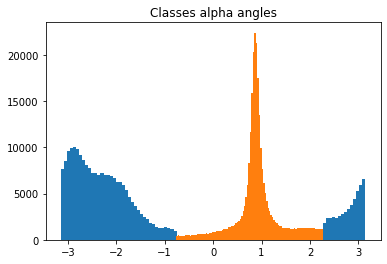

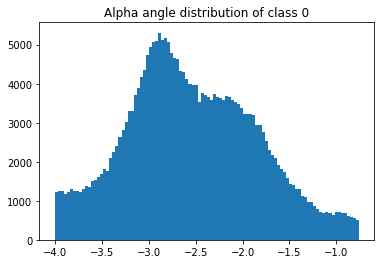

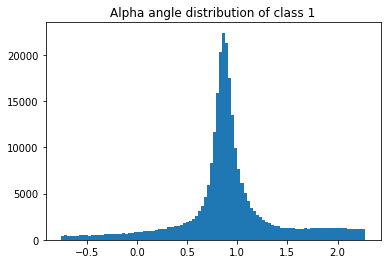

In [7]:
print('Class 0: %d elements' % clusterizer_2.angle_class_idxs[0].sum())
print('Class 1: %d elements' % clusterizer_2.angle_class_idxs[1].sum())


plt.hist(clusterizer_2.angle_class[0], bins=100);
plt.hist(clusterizer_2.angle_class[1], bins=100);
plt.title('Classes alpha angles')
plt.show()
    
plt.hist(np.append(clusterizer_2.angle_class[0][clusterizer_2.angle_class[0] < 0],
                   clusterizer_2.angle_class[0][clusterizer_2.angle_class[0] > 0] - 2 * np.pi), bins=100);
plt.title('Alpha angle distribution of class 0')
plt.show()

plt.hist(clusterizer_2.angle_class[1], bins=100);
plt.title('Alpha angle distribution of class 1')
plt.show()

## Experiments

In [8]:
from models.Conv1d import Conv1d
from models.Conv1d_BiLSTM import Conv1d_BiLSTM
from models.Conv1d_BiLSTM_Conv2d import Conv1d_BiLSTM_Conv2d
from models.Conv1d_Conv2d import Conv1d_Conv2d
from models.BiLSTM import BiLSTM
from models.BiLSTM_Conv2d import BiLSTM_Conv2d
from models.Conv2d import Conv2d
from models.UConv1d import UConv1d
from models.UConv1d_BiLSTM import UConv1d_BiLSTM
from models.UConv1d_BiLSTM_Conv2d import UConv1d_BiLSTM_Conv2d


models = ['Conv1d', 'Conv1d_BiLSTM', 'Conv1d_BiLSTM_Conv2d', 'Conv1d_Conv2d', 'BiLSTM',
          'BiLSTM_Conv2d', 'Conv2d', 'UConv1d', 'UConv1d_BiLSTM', 'UConv1d_BiLSTM_Conv2d']

trainers = {m : {} for m in models}

### Model Conv1d

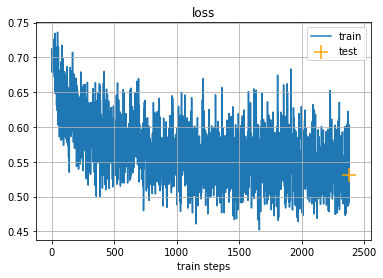

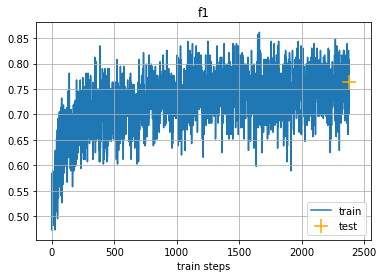

Epoch: 1, val loss: 0.5315187712180076, val f1: 0.7643545587429199


In [9]:
model = Conv1d(len_subseq=dataset_8.len_subseq, n_class=2)

trainer = Trainer(model, dataset_8, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv1d'][8] = trainer

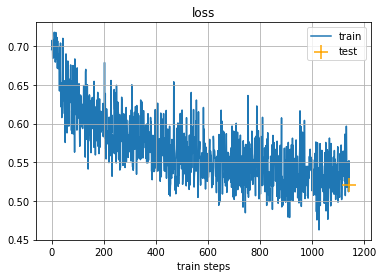

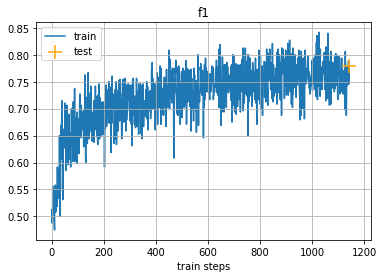

Epoch: 1, val loss: 0.520797276113293, val f1: 0.7785299016012712


In [10]:
model = Conv1d(len_subseq=dataset_16.len_subseq, n_class=2)

trainer = Trainer(model, dataset_16, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv1d'][16] = trainer

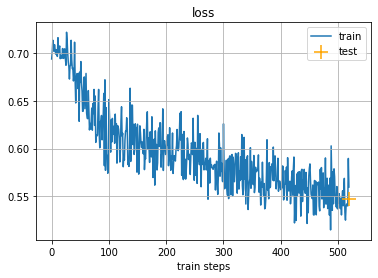

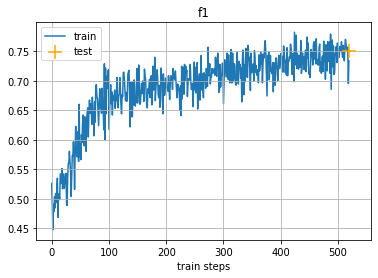

Epoch: 1, val loss: 0.5475540076908858, val f1: 0.75015625952802


In [11]:
model = Conv1d(len_subseq=dataset_32.len_subseq, n_class=2)

trainer = Trainer(model, dataset_32, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv1d'][32] = trainer

### Model Conv1d_BiLSTM

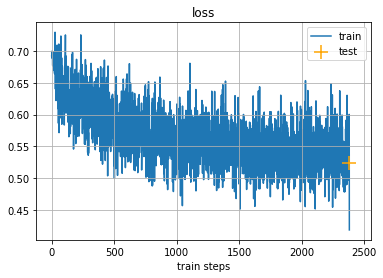

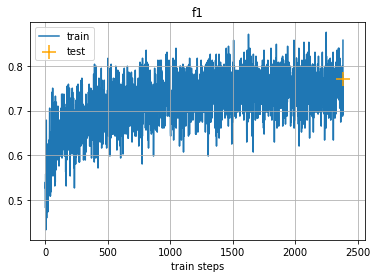

Epoch: 1, val loss: 0.5243238969540086, val f1: 0.771140305656339


In [12]:
model = Conv1d_BiLSTM(len_subseq=dataset_8.len_subseq, n_class=2)

trainer = Trainer(model, dataset_8, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv1d_BiLSTM'][8] = trainer

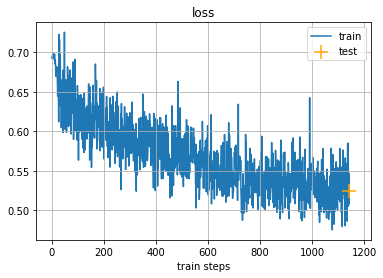

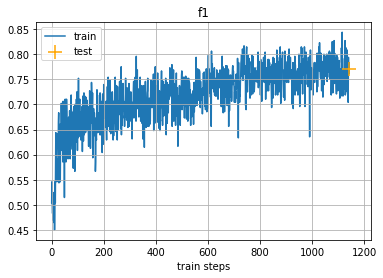

Epoch: 1, val loss: 0.5248718840060848, val f1: 0.7708929226255957


In [13]:
model = Conv1d_BiLSTM(len_subseq=dataset_16.len_subseq, n_class=2)

trainer = Trainer(model, dataset_16, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv1d_BiLSTM'][16] = trainer

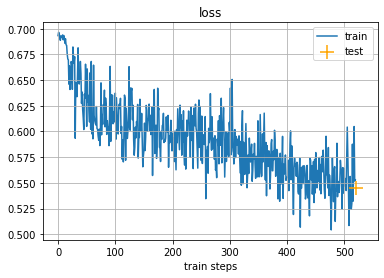

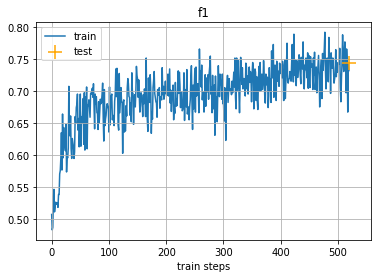

Epoch: 1, val loss: 0.544670960177546, val f1: 0.7441979122202573


In [14]:
model = Conv1d_BiLSTM(len_subseq=dataset_32.len_subseq, n_class=2)

trainer = Trainer(model, dataset_32, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv1d_BiLSTM'][32] = trainer

### Model Conv1d_BiLSTM_Conv2d

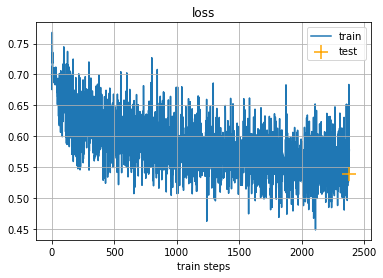

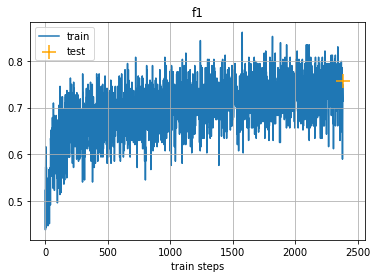

Epoch: 1, val loss: 0.5382682457389288, val f1: 0.7568795515648248


In [15]:
model = Conv1d_BiLSTM_Conv2d(len_subseq=dataset_8.len_subseq, n_class=2)

trainer = Trainer(model, dataset_8, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv1d_BiLSTM_Conv2d'][8] = trainer

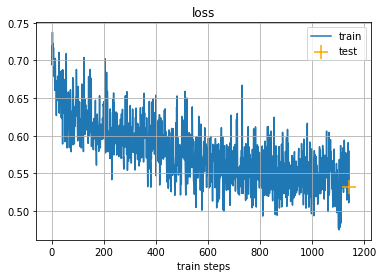

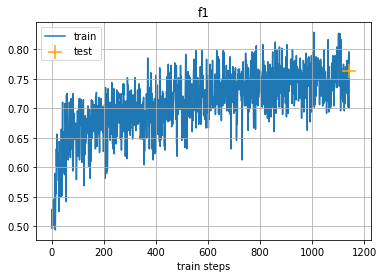

Epoch: 1, val loss: 0.5318163742523382, val f1: 0.7641753758709204


In [16]:
model = Conv1d_BiLSTM_Conv2d(len_subseq=dataset_16.len_subseq, n_class=2)

trainer = Trainer(model, dataset_16, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv1d_BiLSTM_Conv2d'][16] = trainer

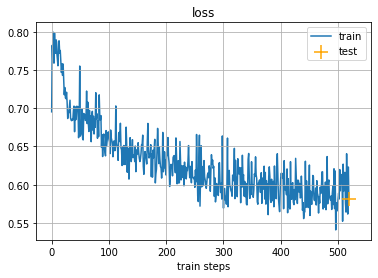

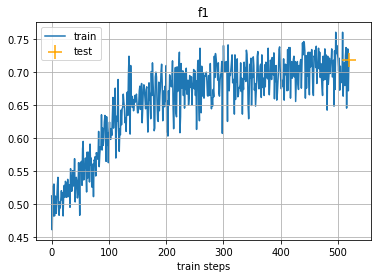

Epoch: 1, val loss: 0.5808313871207444, val f1: 0.7185637272089762


In [17]:
model = Conv1d_BiLSTM_Conv2d(len_subseq=dataset_32.len_subseq, n_class=2)

trainer = Trainer(model, dataset_32, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv1d_BiLSTM_Conv2d'][32] = trainer

### Model Conv1d_Conv2d

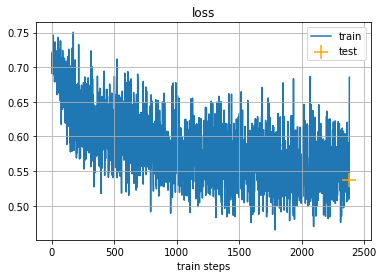

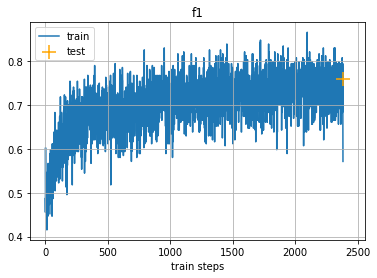

Epoch: 1, val loss: 0.5366320595888514, val f1: 0.7584725992534781


In [18]:
model = Conv1d_Conv2d(len_subseq=dataset_8.len_subseq, n_class=2)

trainer = Trainer(model, dataset_8, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv1d_Conv2d'][8] = trainer

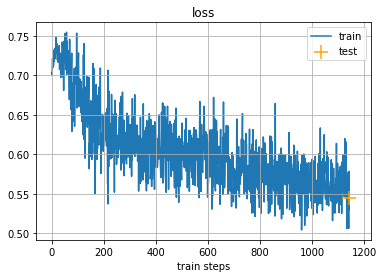

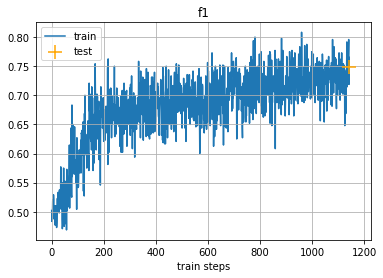

Epoch: 1, val loss: 0.5448694435676725, val f1: 0.7488055402762497


In [19]:
model = Conv1d_Conv2d(len_subseq=dataset_16.len_subseq, n_class=2)

trainer = Trainer(model, dataset_16, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv1d_Conv2d'][16] = trainer

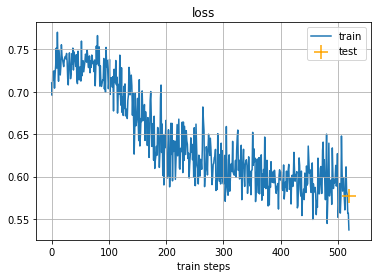

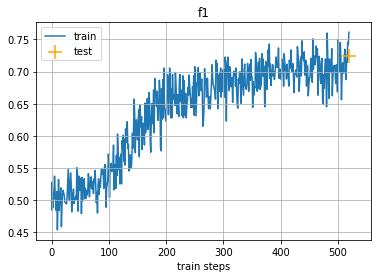

Epoch: 1, val loss: 0.5771061130191969, val f1: 0.7250318235868041


In [20]:
model = Conv1d_Conv2d(len_subseq=dataset_32.len_subseq, n_class=2)

trainer = Trainer(model, dataset_32, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv1d_Conv2d'][32] = trainer

### Model BiLSTM

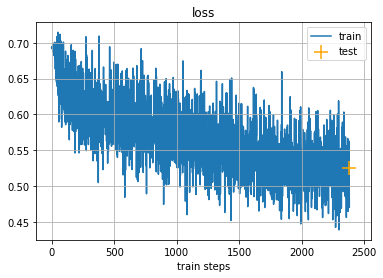

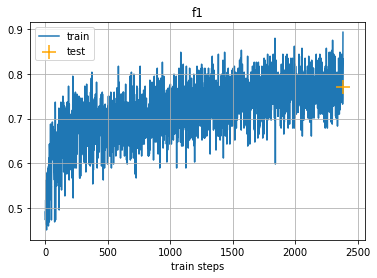

Epoch: 1, val loss: 0.5252929029725226, val f1: 0.7693433348124559


In [21]:
model = BiLSTM(len_subseq=dataset_8.len_subseq, n_class=2)

trainer = Trainer(model, dataset_8, clusterizer_2)
trainer.train(n_epochs=1)

trainers['BiLSTM'][8] = trainer

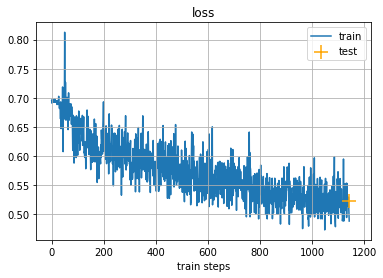

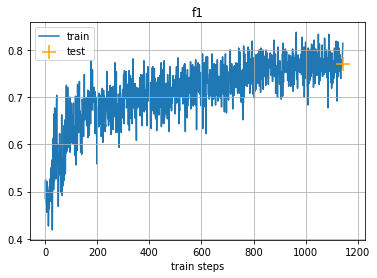

Epoch: 1, val loss: 0.5235977785126997, val f1: 0.7710128651754065


In [22]:
model = BiLSTM(len_subseq=dataset_16.len_subseq, n_class=2)

trainer = Trainer(model, dataset_16, clusterizer_2)
trainer.train(n_epochs=1)

trainers['BiLSTM'][16] = trainer

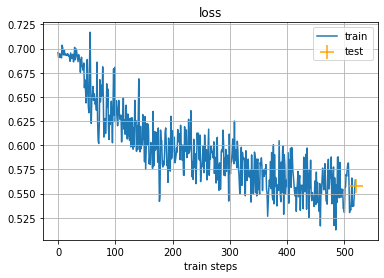

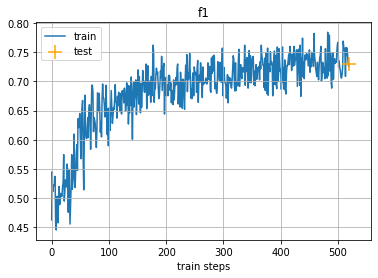

Epoch: 1, val loss: 0.5573339520589166, val f1: 0.7307052830965304


In [23]:
model = BiLSTM(len_subseq=dataset_32.len_subseq, n_class=2)

trainer = Trainer(model, dataset_32, clusterizer_2)
trainer.train(n_epochs=1)

trainers['BiLSTM'][32] = trainer

### Model BiLSTM_Conv2d

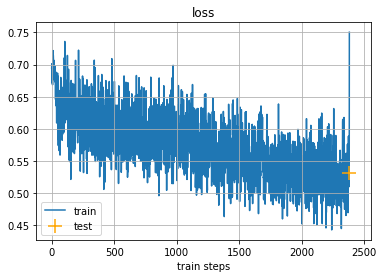

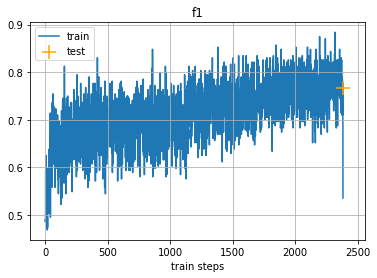

Epoch: 1, val loss: 0.5316838410433001, val f1: 0.76622902038579


In [24]:
model = BiLSTM_Conv2d(len_subseq=dataset_8.len_subseq, n_class=2)

trainer = Trainer(model, dataset_8, clusterizer_2)
trainer.train(n_epochs=1)

trainers['BiLSTM_Conv2d'][8] = trainer

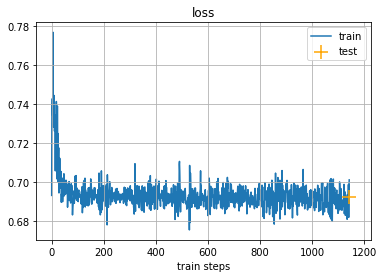

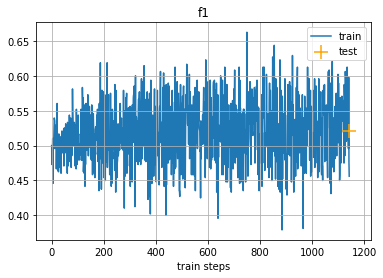

Epoch: 1, val loss: 0.6924513407272868, val f1: 0.5202752566923359


In [25]:
model = BiLSTM_Conv2d(len_subseq=dataset_16.len_subseq, n_class=2)

trainer = Trainer(model, dataset_16, clusterizer_2)
trainer.train(n_epochs=1)

trainers['BiLSTM_Conv2d'][16] = trainer

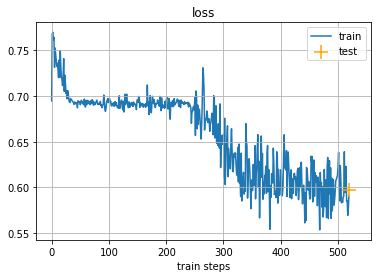

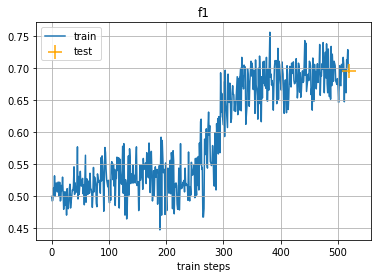

Epoch: 1, val loss: 0.5973625254371892, val f1: 0.6952219838099886


In [26]:
model = BiLSTM_Conv2d(len_subseq=dataset_32.len_subseq, n_class=2)

trainer = Trainer(model, dataset_32, clusterizer_2)
trainer.train(n_epochs=1)

trainers['BiLSTM_Conv2d'][32] = trainer

### Model Conv2d

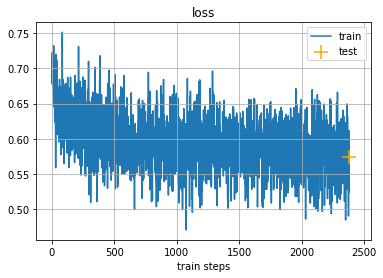

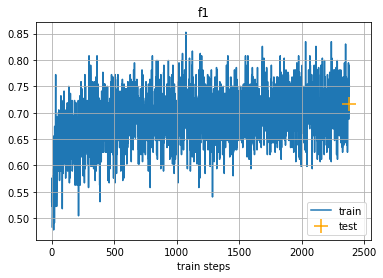

Epoch: 1, val loss: 0.5733400860761521, val f1: 0.7169318211479732


In [27]:
model = Conv2d(len_subseq=dataset_8.len_subseq, n_class=2)

trainer = Trainer(model, dataset_8, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv2d'][8] = trainer

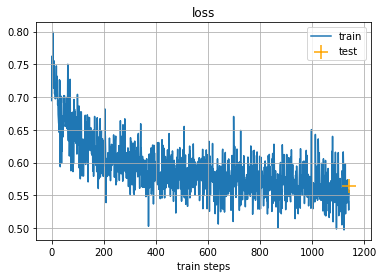

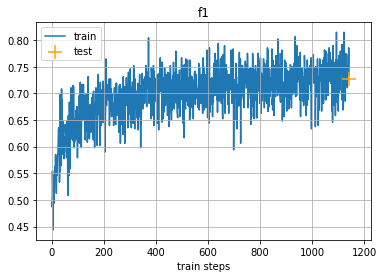

Epoch: 1, val loss: 0.5648449916060608, val f1: 0.7277857994132746


In [28]:
model = Conv2d(len_subseq=dataset_16.len_subseq, n_class=2)

trainer = Trainer(model, dataset_16, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv2d'][16] = trainer

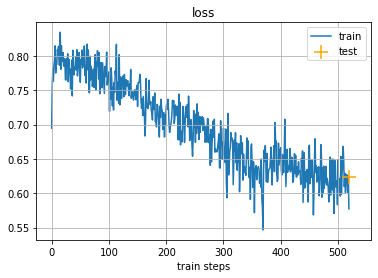

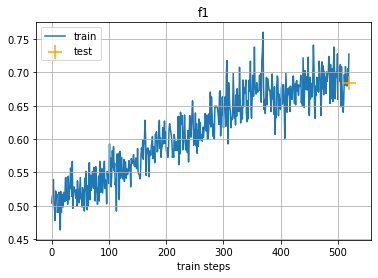

Epoch: 1, val loss: 0.6233968313621439, val f1: 0.6841351797365693


In [29]:
model = Conv2d(len_subseq=dataset_32.len_subseq, n_class=2)

trainer = Trainer(model, dataset_32, clusterizer_2)
trainer.train(n_epochs=1)

trainers['Conv2d'][32] = trainer

### Model UConv1d

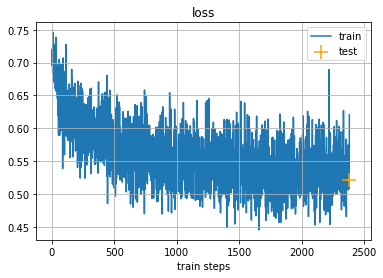

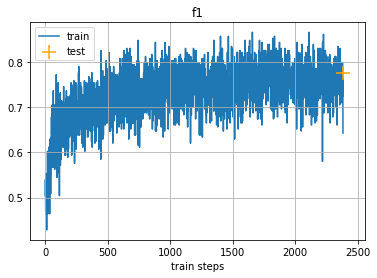

Epoch: 1, val loss: 0.5206006408587204, val f1: 0.7763901033645689


In [30]:
model = UConv1d(len_subseq=dataset_8.len_subseq, n_class=2)

trainer = Trainer(model, dataset_8, clusterizer_2)
trainer.train(n_epochs=1)

trainers['UConv1d'][8] = trainer

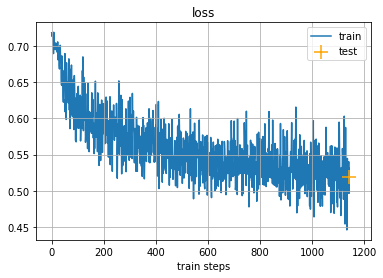

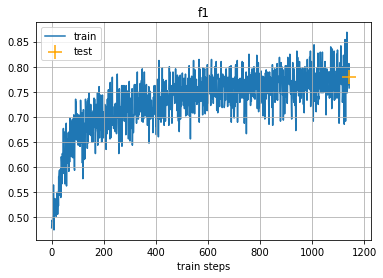

Epoch: 1, val loss: 0.5183855277476924, val f1: 0.7798263506906247


In [31]:
model = UConv1d(len_subseq=dataset_16.len_subseq, n_class=2)

trainer = Trainer(model, dataset_16, clusterizer_2)
trainer.train(n_epochs=1)

trainers['UConv1d'][16] = trainer

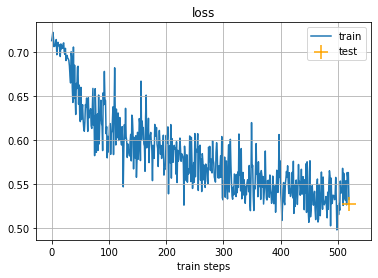

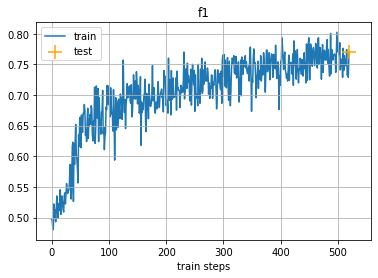

Epoch: 1, val loss: 0.5272965758391048, val f1: 0.770421405268614


In [32]:
model = UConv1d(len_subseq=dataset_32.len_subseq, n_class=2)

trainer = Trainer(model, dataset_32, clusterizer_2)
trainer.train(n_epochs=1)

trainers['UConv1d'][32] = trainer

### Model UConv1d_BiLSTM

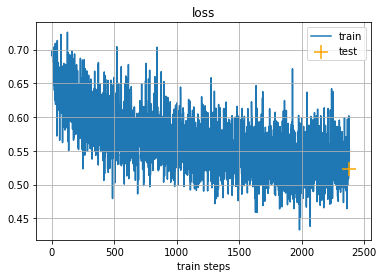

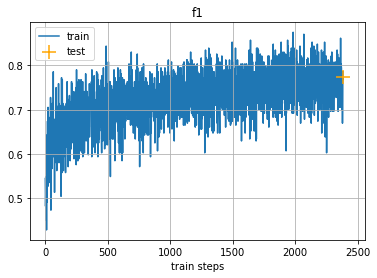

Epoch: 1, val loss: 0.5224836943693228, val f1: 0.7735808579781265


In [33]:
model = UConv1d_BiLSTM(len_subseq=dataset_8.len_subseq, n_class=2)

trainer = Trainer(model, dataset_8, clusterizer_2)
trainer.train(n_epochs=1)

trainers['UConv1d_BiLSTM'][8] = trainer

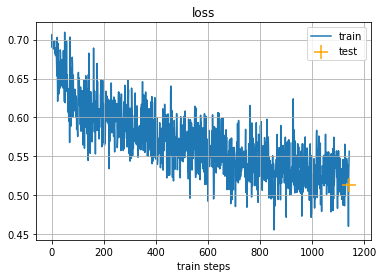

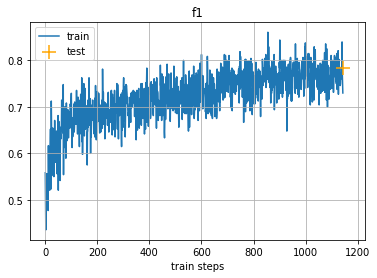

Epoch: 1, val loss: 0.5126316637390911, val f1: 0.7843940991321354


In [34]:
model = UConv1d_BiLSTM(len_subseq=dataset_16.len_subseq, n_class=2)

trainer = Trainer(model, dataset_16, clusterizer_2)
trainer.train(n_epochs=1)

trainers['UConv1d_BiLSTM'][16] = trainer

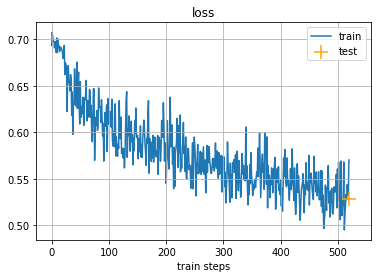

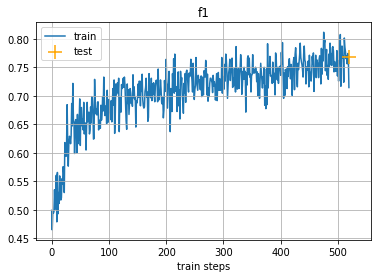

Epoch: 1, val loss: 0.5286017439287641, val f1: 0.767327180773218


In [35]:
model = UConv1d_BiLSTM(len_subseq=dataset_32.len_subseq, n_class=2)

trainer = Trainer(model, dataset_32, clusterizer_2)
trainer.train(n_epochs=1)

trainers['UConv1d_BiLSTM'][32] = trainer

### Model UConv1d_BiLSTM_Conv2d

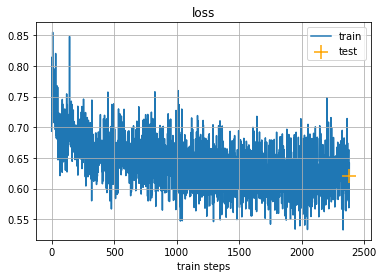

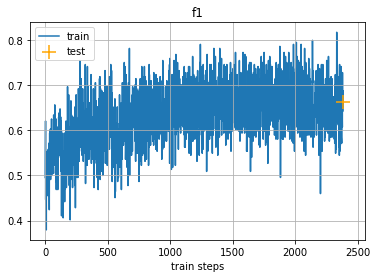

Epoch: 1, val loss: 0.6199470488022738, val f1: 0.662366878964266


In [36]:
model = UConv1d_BiLSTM_Conv2d(len_subseq=dataset_8.len_subseq, n_class=2)

trainer = Trainer(model, dataset_8, clusterizer_2)
trainer.train(n_epochs=1)

trainers['UConv1d_BiLSTM_Conv2d'][8] = trainer

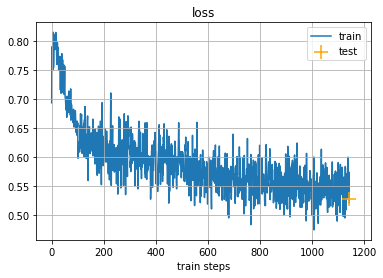

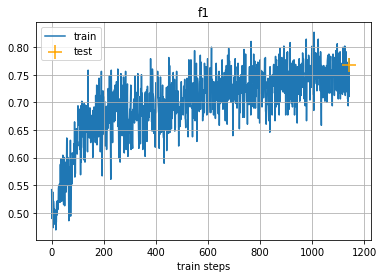

Epoch: 1, val loss: 0.5285978638889766, val f1: 0.7675971763843049


In [37]:
model = UConv1d_BiLSTM_Conv2d(len_subseq=dataset_16.len_subseq, n_class=2)

trainer = Trainer(model, dataset_16, clusterizer_2)
trainer.train(n_epochs=1)

trainers['UConv1d_BiLSTM_Conv2d'][16] = trainer

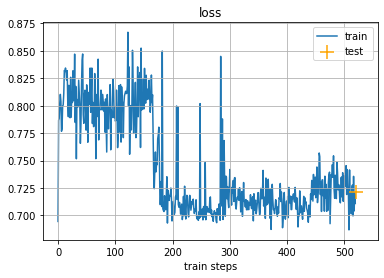

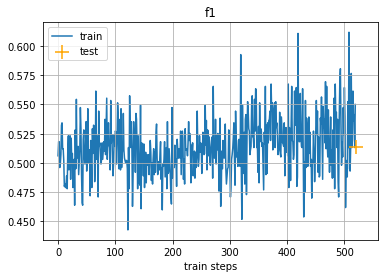

Epoch: 1, val loss: 0.7216538236193035, val f1: 0.5133568548387097


In [38]:
model = UConv1d_BiLSTM_Conv2d(len_subseq=dataset_32.len_subseq, n_class=2)

trainer = Trainer(model, dataset_32, clusterizer_2)
trainer.train(n_epochs=1)

trainers['UConv1d_BiLSTM_Conv2d'][32] = trainer

## Results

In [55]:
from sklearn.metrics import f1_score

def compute_scores(trainers):
    scores = []
    for m in models:
        m_score = []
        for s, t in trainers[m].items():
            m_score.append(f1_score(t.targs, torch.argmax(t.preds, dim=-1)))
        scores.append(m_score)
    return scores

In [107]:
result_2class = pd.DataFrame(data=scores, index=models, columns=[8, 16, 32])
result_2class.index.name = 'Model \ Length of subsequence'

display(result_2class)

best_result_2class = pd.DataFrame(pd.concat([result_2class.idxmax(axis=0), result_2class.max(axis=0)], axis=1))
best_result_2class.columns = ['Best model', 'Best score']
best_result_2class.index.name = 'Length of subsequence'


display(best_result_2class)

,8,16,32
Model \ Length of subsequence,,,
Conv1d,0.684515,0.784593,0.751144
Conv1d_BiLSTM,0.768941,0.772215,0.740609
Conv1d_BiLSTM_Conv2d,0.762341,0.771976,0.673998
Conv1d_Conv2d,0.771749,0.753445,0.718649
BiLSTM,0.769193,0.761987,0.721498
BiLSTM_Conv2d,0.773942,0.669704,0.667083
Conv2d,0.701896,0.711607,0.650709
UConv1d,0.777826,0.787411,0.771708
UConv1d_BiLSTM,0.784165,0.785265,0.773755


,Best model,Best score
Length of subsequence,,
8,UConv1d_BiLSTM,0.784165
16,UConv1d,0.787411
32,UConv1d_BiLSTM,0.773755
